<a href="https://colab.research.google.com/github/BHARATH077/customer-churn-ml/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Data Exploration

import pandas as pd

# Load dataset directly from github
url = 'https://raw.githubusercontent.com/BHARATH077/customer-churn-ml/refs/heads/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# Basic checks
print("Dataset Shape:", df.shape) #rows, columns
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# Check target column
print("\nChurn value counts:", df['Churn'].value_counts())

Dataset Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

First 5 rows:
    custo

Missing Values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Summary Statistics for numerical features:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Cat

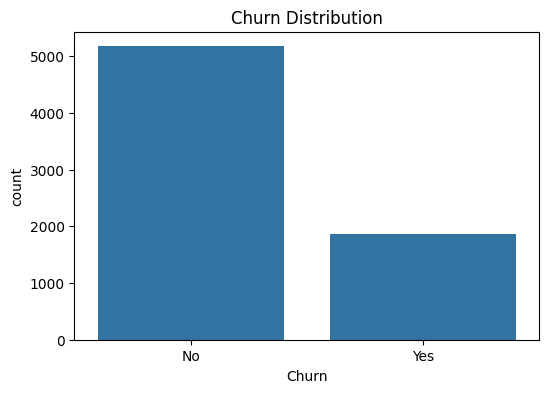

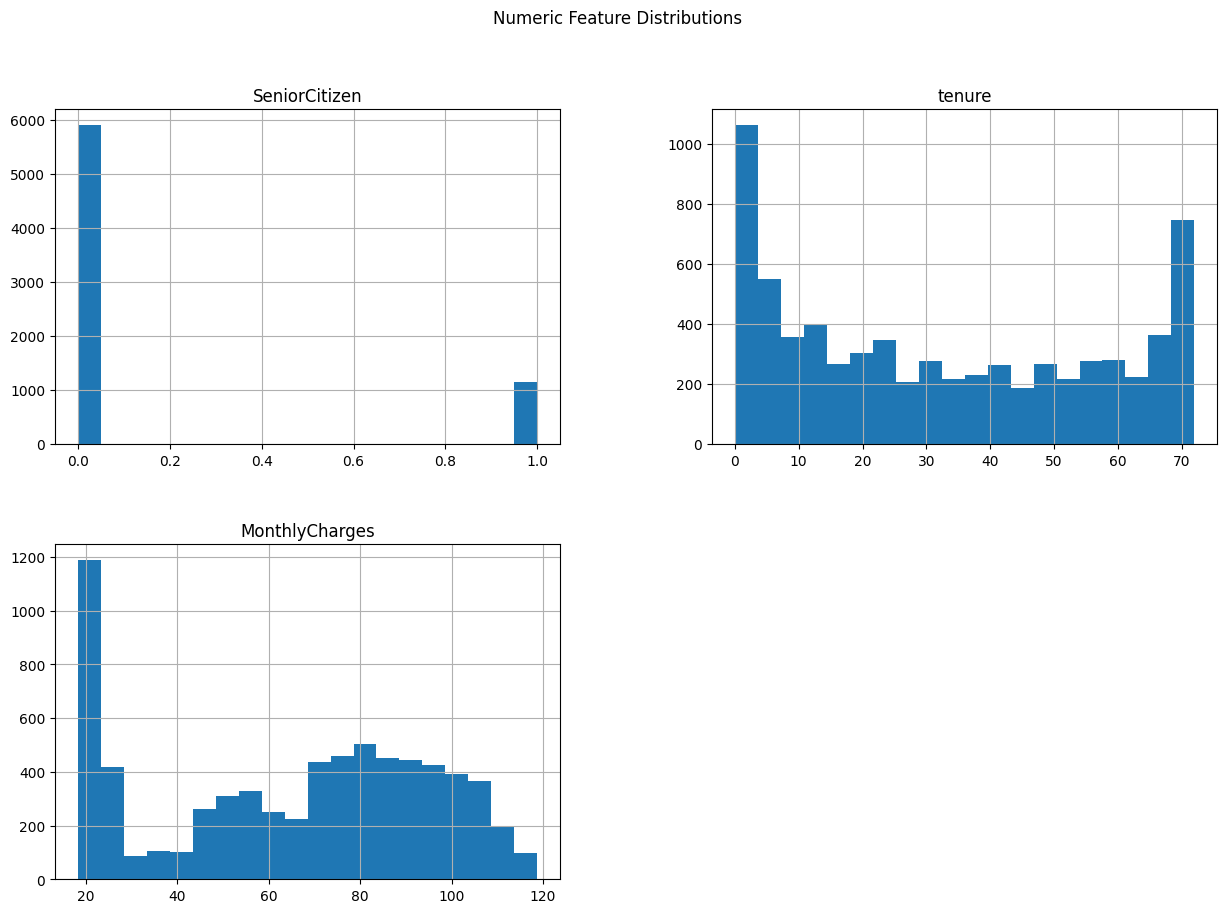

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


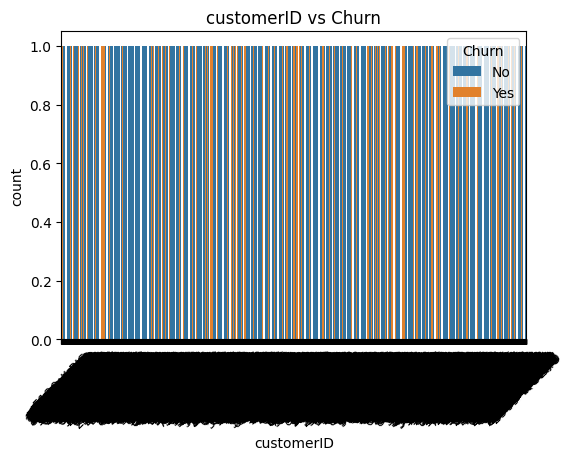

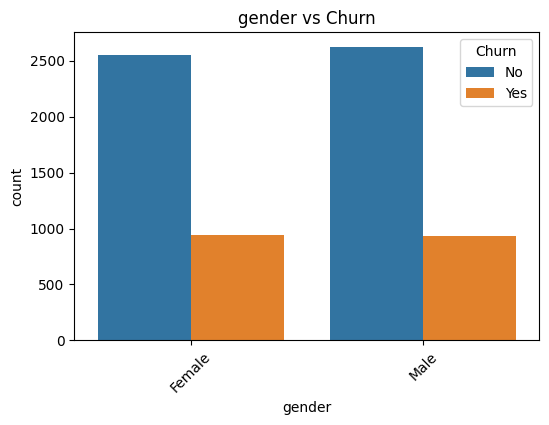

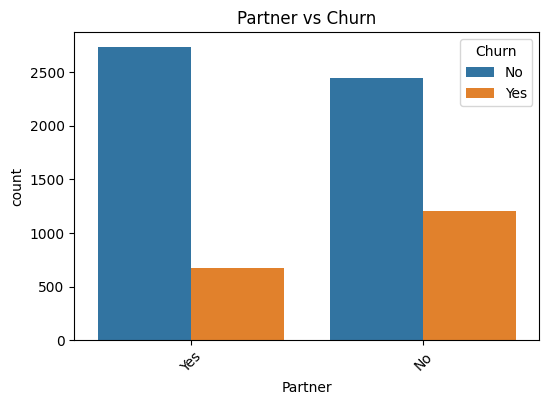

In [5]:
# Extended EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Missing Values
print("Missing Values per column:")
print(df.isnull().sum())

# Summary Stats
print("\nSummary Statistics for numerical features:")
print(df.describe())

# Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)

for col in categorical_cols:
  print(f"\nValue counts for {col}:")
  print(df[col].value_counts())

# Visualizations
plt.figure(figsize=(6,4))
sns.countplot(data = df, x='Churn')
plt.title("Churn Distribution")
plt.show()

# Histograms for Numerical features
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Numeric Feature Distributions")
plt.show()

# Bar plot for Categorical features (First 3 as example)
for col in categorical_cols[:3]:
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x=col, hue='Churn')
  plt.title(f"{col} vs Churn")
  plt.xticks(rotation=45)
  plt.show()


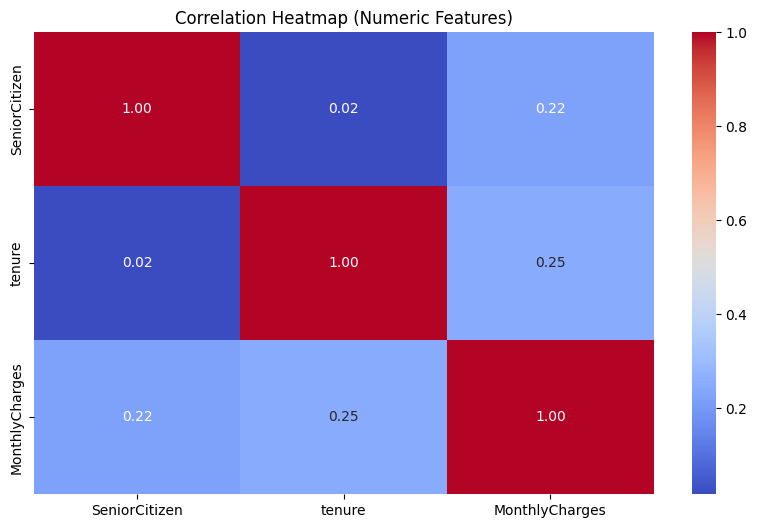

In [6]:
# Bivariate Analysis
# Correlation Heatmap for Numeric Features
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn, dtype: float64


/tmp/ipython-input-2883013304.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="coolwarm")


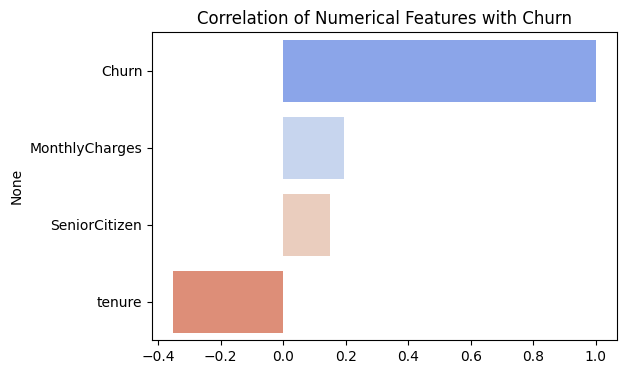

In [7]:
# Correlation for Numeric Features and Churn

# Make a copy of data
df_corr = df.copy()

# Convert Churn to numeric
df_corr['Churn'] = df_corr["Churn"].map({'Yes':1, 'No':0})

# Select Numerical Features + Churn
num_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute Correlation
corr = df_corr[num_cols].corr()

# Focus only on correlation with churn
churn_corr = corr["Churn"].sort_values(ascending=False)
print(churn_corr)

# Heatmap of correlations with churn
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="coolwarm")
plt.title("Correlation of Numerical Features with Churn")
plt.show()




# Insights
 - The correlation of Numerical Features vs Churn shows us that 'tenure' is negatively correlated with churn(Longer customers are less likely to churn).
- 'MonthlyCharges' and 'SeniorCitizen' has a weak positive correlation with churn.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


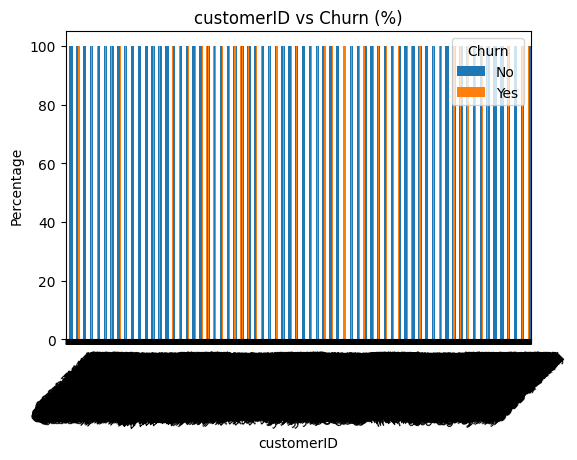

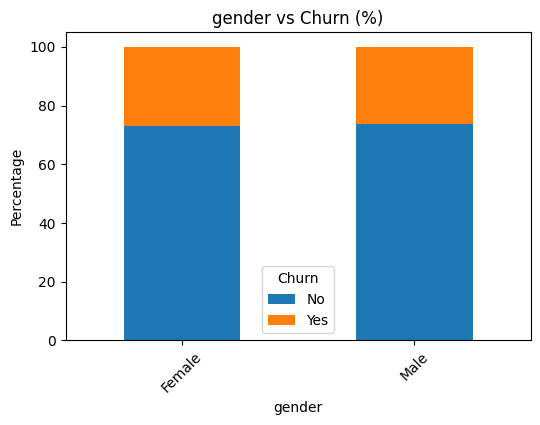

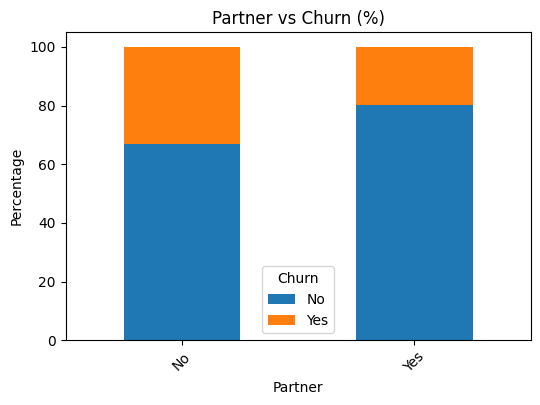

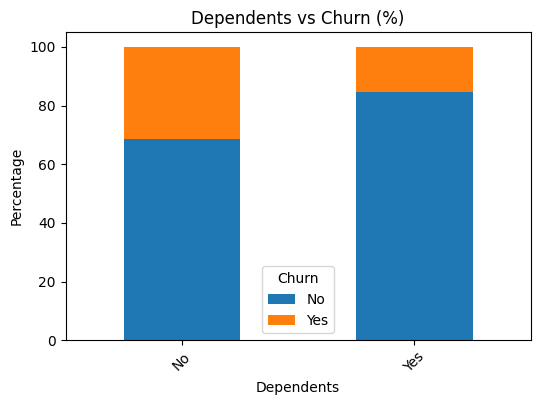

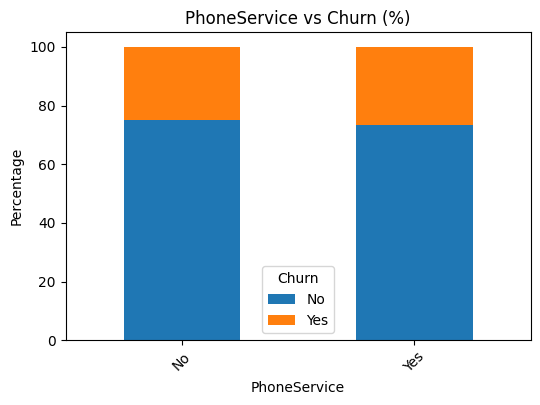

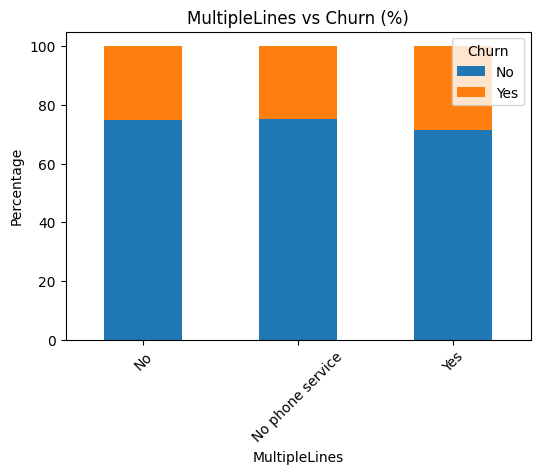

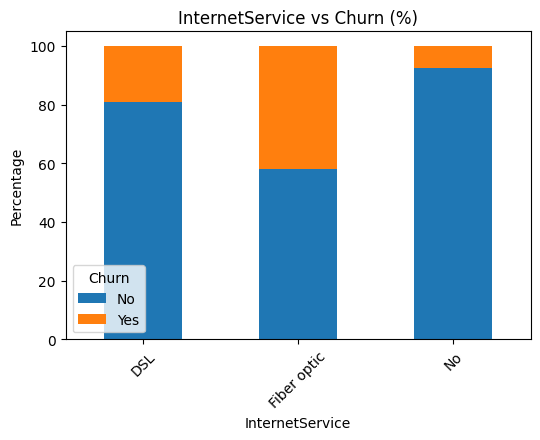

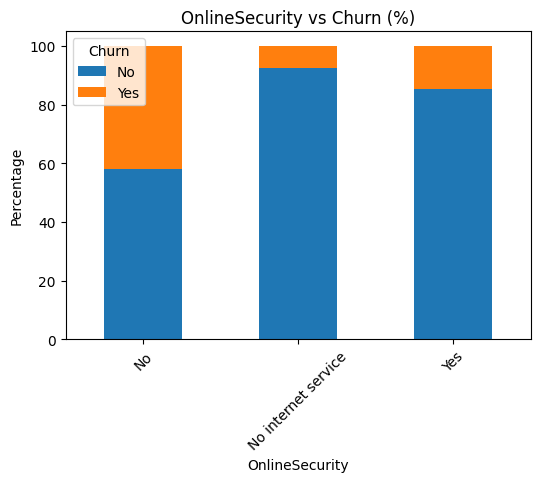

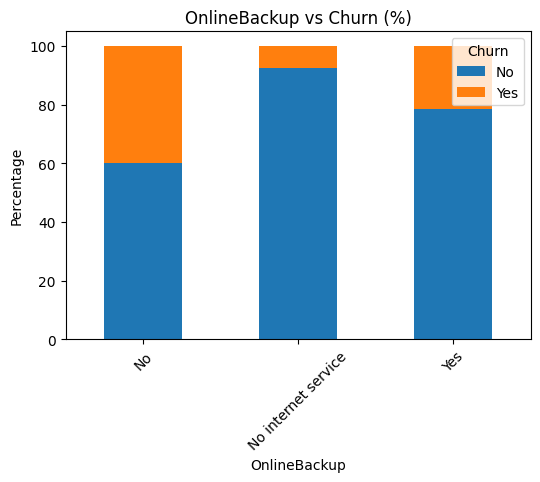

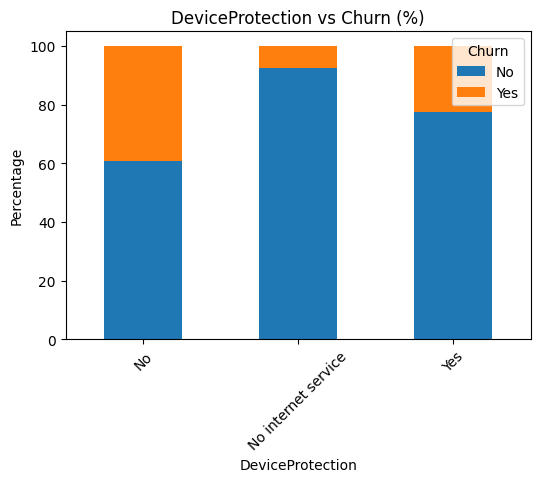

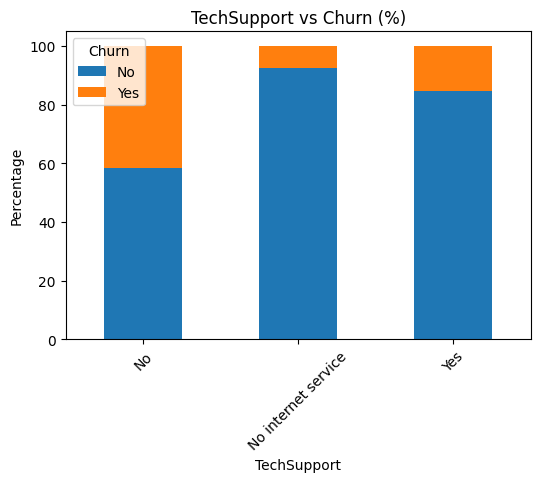

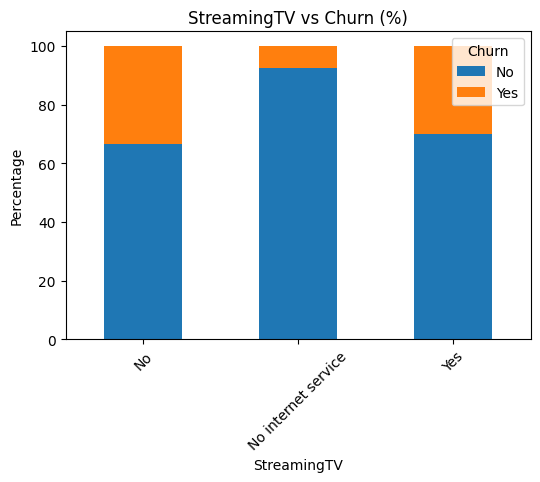

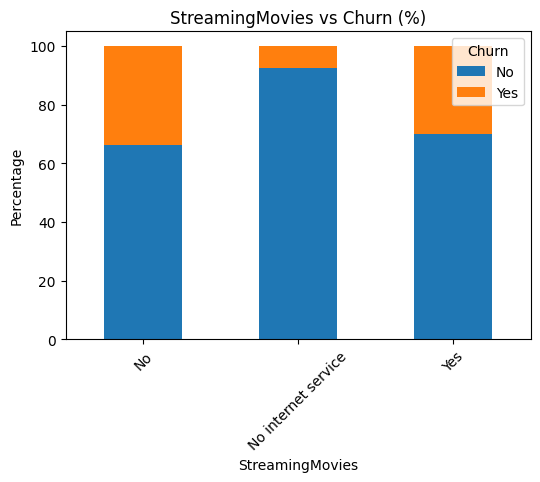

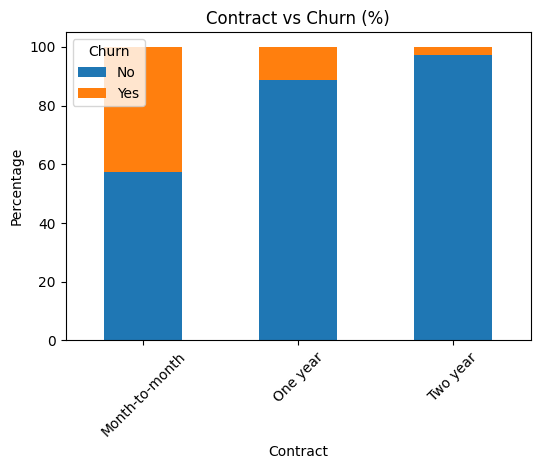

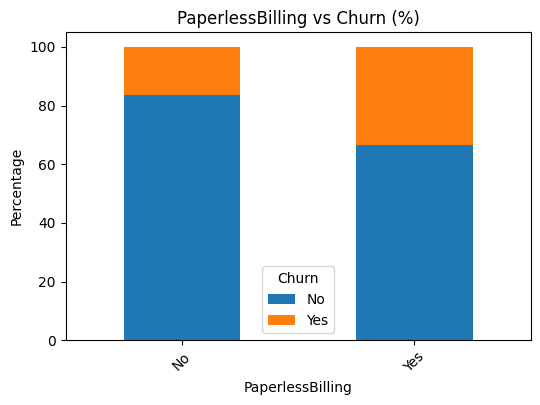

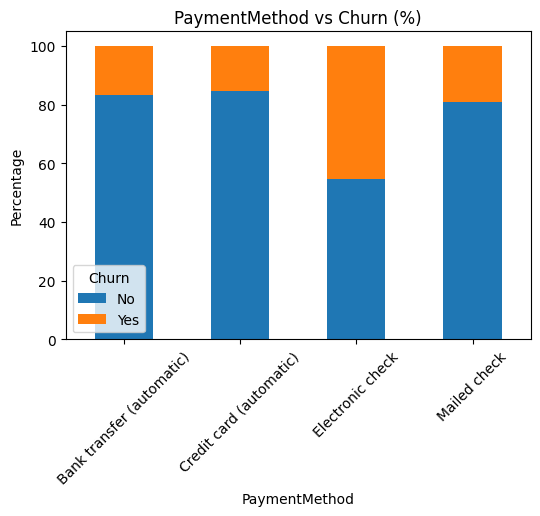

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


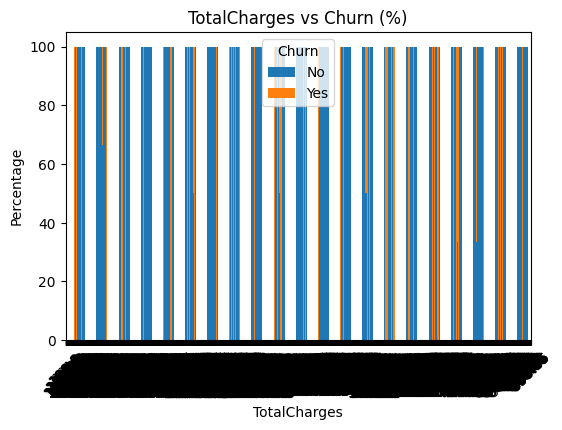

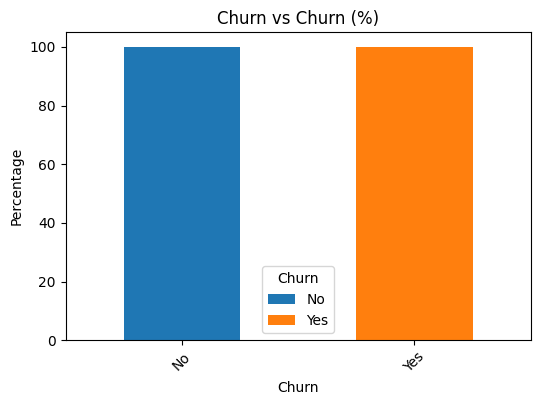

In [8]:
# Categorical Features vs Churn
# Percentage bar plots for categorical features vs Churn
for col in categorical_cols:
    churn_pct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    churn_pct.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f"{col} vs Churn (%)")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.legend(title="Churn")
    plt.show()


# Insights
## From Categorical Plots:
  - Customers who use their 'Internet service' with Fiber optic are likely to churn compared to DSL.
  - Customers with No 'online security' are also likely to churn.
  - Customers with No 'Tech support' are likely to churn.
  - Customers with 'Month to Month' contracts churn more than those with 'Two Year' contracts
  - Eletronic check payment method has a much higher churn rate compared to other payment types.

# Customer Churn Insights - Executive Summary

Based on Exploratory Analysis
1. **Tennure Matters**: Customers who have stayed longer are less likely to leave
2. **Billing issues drive churn**: Higher monthly charges increases churn.
3. **Internet Service type matters**: Custmers using fiber optic are more likely to churn compared to DSL or with No internet.
4. **Contract type is Key**: Month-to-Month customers are at a greater risk.
5. **Payment method influences churn**: Eletronic check customers are more at risk.
6. **Tech Support**: Without proper tech support customers are more likely to churn.

In [9]:
# Data Preprocessing for Machine Learning

#Step1: Encode target variable.(churn to numeric)
df_ml = df.copy()
df_ml['Churn'] = df_ml['Churn'].map({'Yes':1, 'No':0})


# Step2: Handle total_charges

# convert total_charges to numeric
df_ml['TotalCharges'] = pd.to_numeric(df_ml["TotalCharges"], errors="coerce")

# Check missing values
print(df_ml["TotalCharges"].isna().sum())

# Filling missing values with median(safe choice for numeric feature)
df_ml["TotalCharges"].fillna(df_ml["TotalCharges"].median(), inplace=True)


# Step3: Separate categorical and numerical features

# Drop ID Column
df_ml.drop("customerID", axis=1, inplace=True)

#Identify categorical and numeric
cat_cols = df_ml.select_dtypes(include=['object']).columns.tolist()
num_cols = df_ml.select_dtypes(include=["int64","float64"]).columns.tolist()
num_cols.remove("Churn")   #Exclude the target



#Step4: Encode Cateorical variables (We will use one-hot encoding)
df_encoded = pd.get_dummies(df_ml, columns=cat_cols, drop_first=True)



#Step5: Train-Test Split
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Churn",axis=1)
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


# Feature Scaling for numeric features only
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])




11


/tmp/ipython-input-150119383.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ml["TotalCharges"].fillna(df_ml["TotalCharges"].median(), inplace=True)


Train shape: (5634, 30)
Test shape: (1409, 30)


Accuracy: 0.7381121362668559


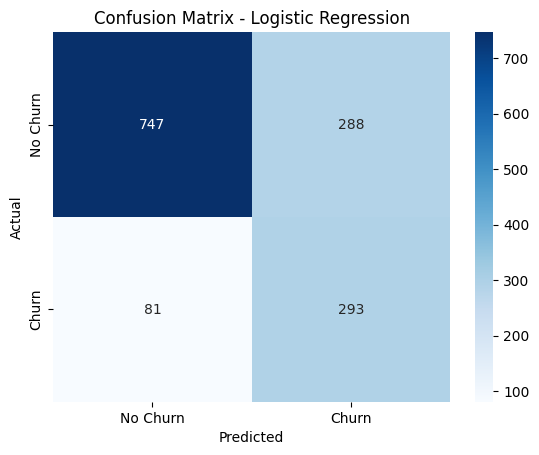

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [10]:
# Baseline Model: Logistic Regression

# Step1: Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step2: Train Logistic Regression
# Initialize model
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)

# Train
log_reg.fit(X_train, y_train)

#Step3: Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]  # probabilities of churn

# Step4: Evaluate Performace
#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#Classification Report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



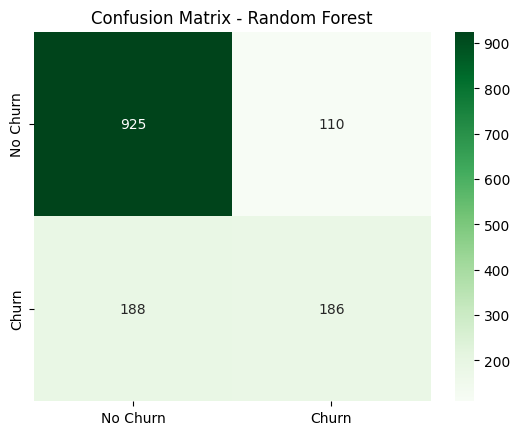

ROC-AUC Score: 0.8237541656978996


/tmp/ipython-input-918912168.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")


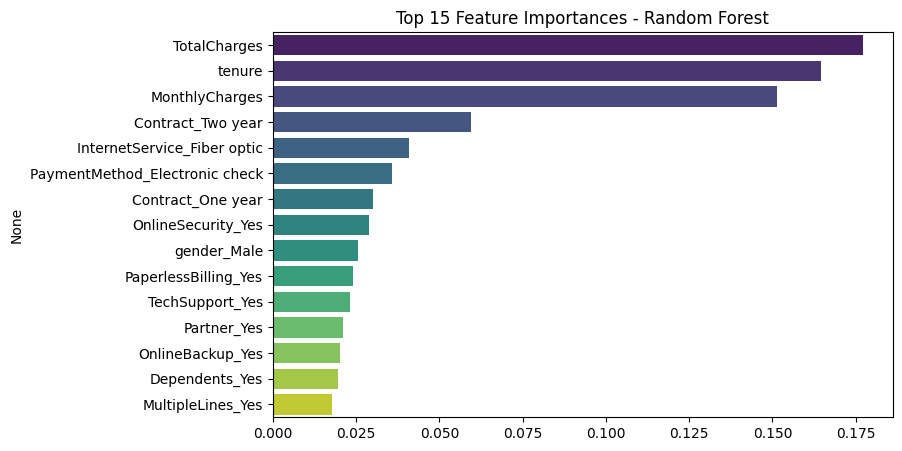

In [11]:
# Random Forest Model & Feature Importance

# Import and Train Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize model
rf = RandomForestClassifier(
    n_estimators=200,          # number of trees
    max_depth=None,            # let trees grow deep
    class_weight="balanced",   # handle class imbalance
    random_state=42,
    n_jobs=-1                  # use all CPU cores
)

# Train
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]


# Evaluate Random Forest
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))


# Feature Importance
import pandas as pd
import numpy as np

# Get feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:38:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.53      0.70      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



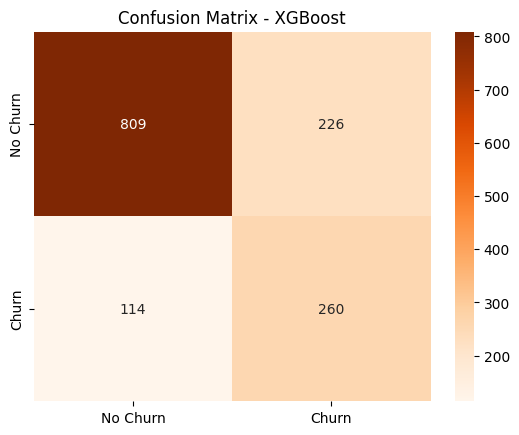

ROC-AUC Score: 0.8269420548192925


/tmp/ipython-input-2284844159.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances_xgb.values, y=feat_importances_xgb.index, palette="magma")


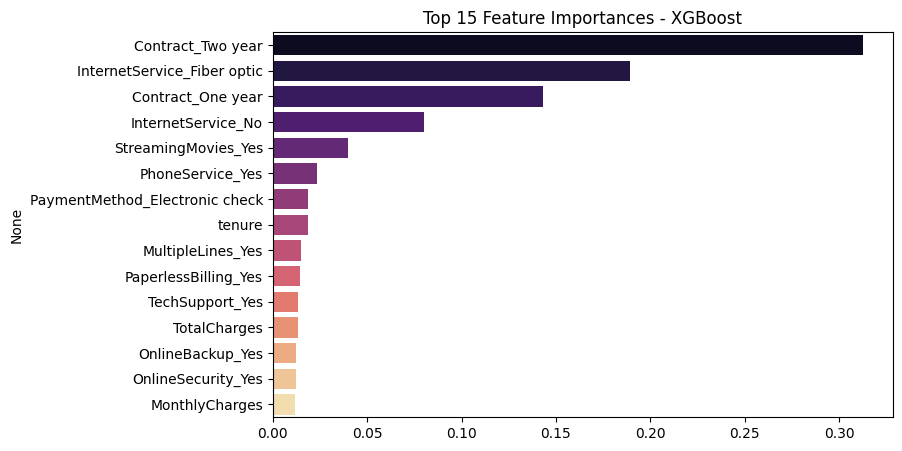

                 Model  Accuracy  Precision (Churn)  Recall (Churn)  \
0  Logistic Regression  0.738112           0.504303        0.783422   
1        Random Forest  0.788502           0.628378        0.497326   
2              XGBoost  0.758694           0.534979        0.695187   

   F1 (Churn)   ROC-AUC  
0    0.613613  0.841691  
1    0.555224  0.823754  
2    0.604651  0.826942  


In [13]:
# XGBoost Model & Model Comparison

# Install & Import XGBoost
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=(len(y_train) - y_train.sum()) / y_train.sum(),  # handle imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]


# Evaluate XGBoost
print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Confusion Matrix - XGBoost")
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))


# Feature Importance (XGBoost style)
import pandas as pd
import matplotlib.pyplot as plt

feat_importances_xgb = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_importances_xgb.values, y=feat_importances_xgb.index, palette="magma")
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()

# Model Comparison Table

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_model(name, y_true, y_pred, y_prob):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (Churn)": precision_score(y_true, y_pred),
        "Recall (Churn)": recall_score(y_true, y_pred),
        "F1 (Churn)": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

results = []
results.append(evaluate_model("Logistic Regression", y_test, y_pred, y_prob))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb))

results_df = pd.DataFrame(results)
print(results_df)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:40:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'subsample': 0.7, 'scale_pos_weight': np.float64(2.768561872909699), 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.7}
                      Model  Accuracy  Precision (Churn)  Recall (Churn)  \
1           XGBoost - Tuned  0.750887           0.520354        0.786096   
0     Random Forest - Tuned  0.765082           0.542240        0.737968   
3        XGBoost - Baseline  0.758694           0.534979        0.695187   
2  Random Forest - Baseline  0.788502           0.628378        0.497326   

   F1 (Churn)   ROC-AUC  
1    0.626198  0.843601  
0    0.625142  0.839568  
3    0.604651  0.826942  
2    0.555224  0.823754  


/tmp/ipython-input-965685050.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="F1 (Churn)", palette="viridis")


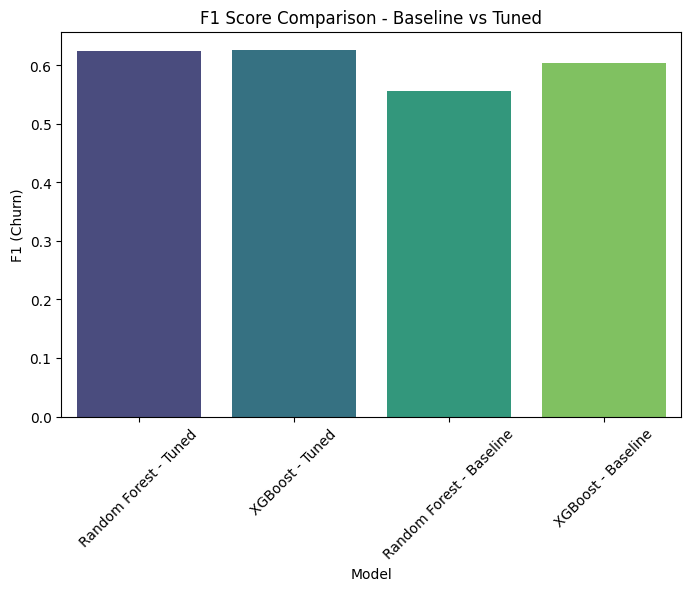

In [14]:
# Hyperparameter Tuning (XGBoost & Random Forest)

# Import Required Libraries
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# Tune Random Forest
# Random Forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=20,  # sample 20 combinations
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring="f1"  # optimize for churn class
)

rf_random.fit(X_train, y_train)

print("Best Random Forest Params:", rf_random.best_params_)

best_rf = rf_random.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)
y_prob_rf_tuned = best_rf.predict_proba(X_test)[:,1]

# Tune XGBoost
xgb_param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'scale_pos_weight': [1, (len(y_train) - y_train.sum()) / y_train.sum()]  # imbalance
}

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=30,  # sample 30 combinations
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring="f1"
)

xgb_random.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_random.best_params_)

best_xgb = xgb_random.best_estimator_

y_pred_xgb_tuned = best_xgb.predict(X_test)
y_prob_xgb_tuned = best_xgb.predict_proba(X_test)[:,1]

# Compare Models Before vs After Tuning
# Collect tuned results
results = []
results.append(evaluate_model("Random Forest - Tuned", y_test, y_pred_rf_tuned, y_prob_rf_tuned))
results.append(evaluate_model("XGBoost - Tuned", y_test, y_pred_xgb_tuned, y_prob_xgb_tuned))

# Add old baseline results for comparison
results.append(evaluate_model("Random Forest - Baseline", y_test, y_pred_rf, y_prob_rf))
results.append(evaluate_model("XGBoost - Baseline", y_test, y_pred_xgb, y_prob_xgb))

results_df = pd.DataFrame(results)
print(results_df.sort_values("ROC-AUC", ascending=False))

# Visualize Improvements
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="F1 (Churn)", palette="viridis")
plt.title("F1 Score Comparison - Baseline vs Tuned")
plt.xticks(rotation=45)
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1a51d382dc59fbbce5f9bf4a8b163e1c800b4ff3072ab4c2091eeac54edca7b2
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


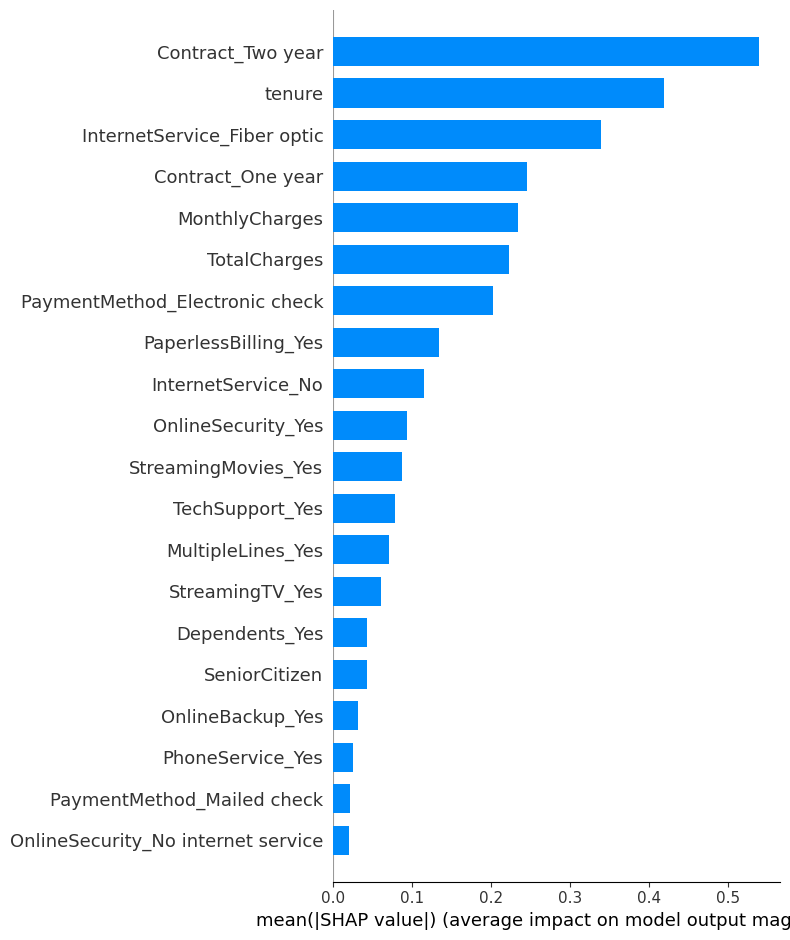

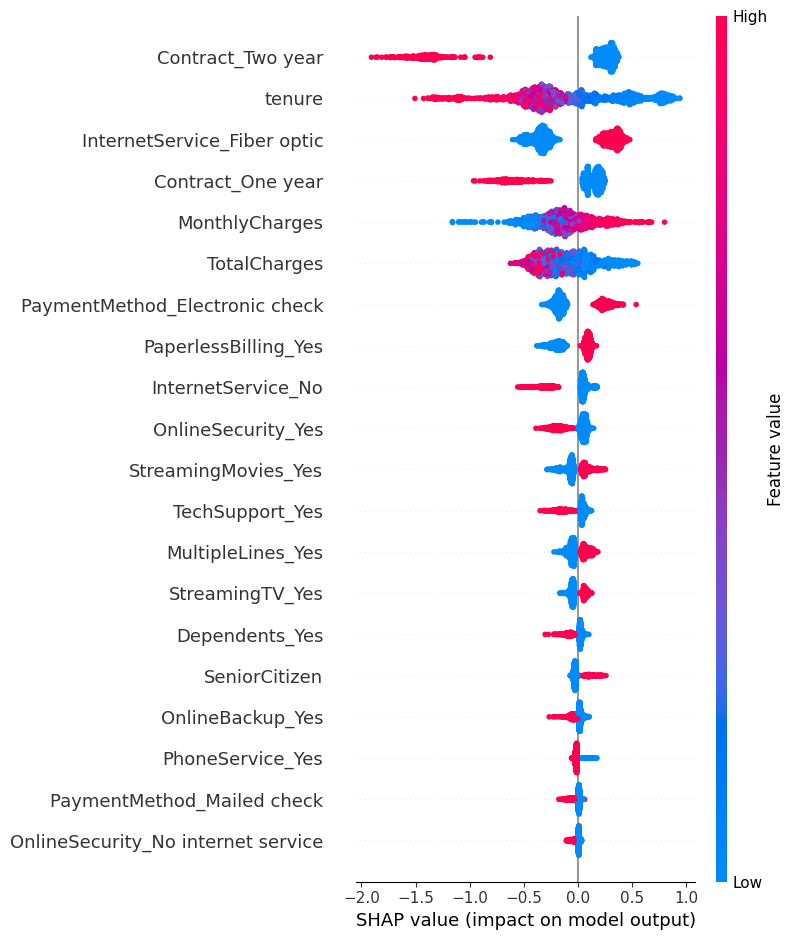

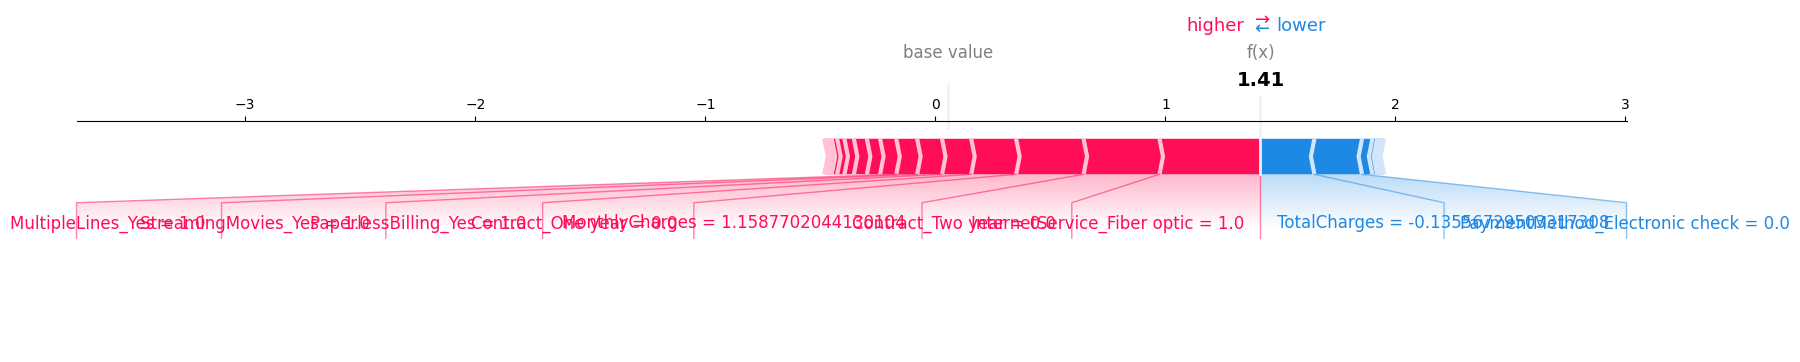

/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [15]:
#Model Explainability with SHAP & LIME

# Install & Import Libraries
!pip install shap lime
import shap
import lime
import lime.lime_tabular

#SHAP (Global Explainability)
# Create SHAP explainer for XGBoost
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# Feature importance (global)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed distribution of feature effects
shap.summary_plot(shap_values, X_test)


# SHAP (Individual Predictions)
# Pick one customer
sample = X_test.iloc[5,:]

# Force plot explanation
shap.force_plot(
    explainer.expected_value,
    shap_values[5,:],
    sample,
    matplotlib=True
)


#LIME (Local Explainability)
# Prepare LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=["No Churn", "Churn"],
    mode='classification'
)

# Explain one prediction
i = 10
exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=best_xgb.predict_proba
)

exp.show_in_notebook(show_table=True)


In [19]:
# Model Deployment with Flask

# Save Your Model
import joblib

# Save model
joblib.dump(best_xgb, "churn_model.pkl")

# Save preprocessor (encoder + scaler) if you used one
#joblib.dump(scaler, "scaler.pkl")
#joblib.dump(encoder, "encoder.pkl")


# Create Flask App
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Load model and preprocessing
model = joblib.load("churn_model.pkl")
#scaler = joblib.load("scaler.pkl")
#encoder = joblib.load("encoder.pkl")

app = Flask(__name__)

@app.route("/")
def home():
    return "Customer Churn Prediction API is running 🚀"

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json(force=True)
    df = pd.DataFrame([data])  # convert dict → dataframe

    # Preprocess (example: encode + scale)
    # NOTE: adjust based on your preprocessing steps
    categorical_cols = ["gender", "InternetService", "Contract"]
    numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

    df[categorical_cols] = encoder.transform(df[categorical_cols])
    df[numerical_cols] = scaler.transform(df[numerical_cols])

    # Prediction
    prediction = model.predict(df)[0]
    probability = model.predict_proba(df)[0][1]

    return jsonify({
        "prediction": int(prediction),
        "churn_probability": float(probability)
    })

if __name__ == "__main__":
    app.run(debug=True)


# Run the API(In the terminal)
# python app.py


#Test the API(In the terminal)
#curl -X POST http://127.0.0.1:5000/predict \
#    -H "Content-Type: application/json" \
#   -d '{"gender": "Female", "InternetService": "Fiber optic", "Contract": "Month-to-month", "tenure": 5, "MonthlyCharges": 80, "TotalCharges": 400}'


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
